<a href="https://colab.research.google.com/github/WHOpsAnalyticsTeam/LMBO_googlescripts/blob/master/Fraud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FROM HERE WE NEED TO UPLOAD THE FILE THAT WILL BE PROCESSED IN THIS CASE THE CPT CODES FILE

In [24]:
from google.colab import files
uploaded = files.upload()

Saving MORE_CPT_STUFF_BY_POI.xlsx to MORE_CPT_STUFF_BY_POI.xlsx


In [0]:
import numpy as np
import pandas as pd
import sklearn
import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [0]:
cpt_ds = pd.read_excel(io.BytesIO(uploaded['MORE_CPT_STUFF_BY_POI.xlsx']))

In [0]:
cpt_ds = cpt_ds.replace(np.nan,0)

FROM THIS POINT WE ARE ARRANGING THE DATASET TO HAVE IT READY FOR THE CLUSTERING ALGORITHM

In [0]:
cpt_ds.columns = cpt_ds.iloc[0]
cpt_ds = cpt_ds.drop(index=0)

In [0]:
cpt_ds1 = cpt_ds

In [72]:
cpt_ds1 = cpt_ds1.drop(index=272)
cpt_ds1['mean'] = cpt_ds1.mean(axis=1)
cpt_ds1

,Providers,97010.0,97035.0,97140.0,97112.0,97110.0,97012.0,99211.0,G0283,97032.0,97039.0,97530.0,S8948,97014.0,97018.0,97026.0,97033.0,98941.0,97034.0,97116.0,98940.0,97535.0,97016.0,98943.0,99213.0,99203.0,99214.0,99204.0,97024.0,97124.0,64999.0,97022.0,A4556,97750.0,72070.0,99070.0,72100.0,99215.0,72040.0,73030.0,...,S8940,64480.0,85610.0,85025.0,27096.0,L3670,E0637,96116.0,A4456,76881.0,95831.0,87086.0,82977.0,J2360,72114.0,J2930,E1399,97044.0,97504.0,J3302,81025.0,64413.0,70110.0,72082.0,74000.0,L0310,L3701,64483.0,73000.0,64484.0,Q9967,72074.0,23350.0,97122.0,76770.0,81000.0,81001.0,99407.0,Grand Total,mean
1,PALMETTOHEALTHMEDICA,8636.0,6730.0,4520.0,6801.0,0.0,8529.0,8642.0,0,2318.0,8588.0,1916.0,5641,0.0,1270.0,0.0,0.0,0.0,0.0,0.0,0.0,539.0,0.0,0.0,300.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64718,328.205556
2,ULTRACARE&DIAGNOSTIC,8500.0,8577.0,9664.0,8066.0,3117.0,1059.0,8525.0,2892,547.0,8425.0,2569.0,2453,0.0,5948.0,0.0,0.0,0.0,0.0,917.0,0.0,4.0,0.0,0.0,304.0,311.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71880,369.627778
3,WELLNESSHEALTHCARECL,5079.0,6371.0,770.0,73.0,2862.0,1625.0,5708.0,3089,3246.0,5706.0,614.0,5575,0.0,1158.0,0.0,0.0,0.0,0.0,0.0,0.0,199.0,0.0,0.0,1.0,7.0,92.0,163.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42338,187.077778
4,THERIGHTSPINALCLINIC,3558.0,4227.0,4291.0,4231.0,9.0,4107.0,409.0,0,1.0,57.0,2148.0,4072,3975.0,66.0,0.0,3935.0,11.0,640.0,0.0,98.0,171.0,120.0,0.0,180.0,207.0,123.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,1,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37232,181.277778
5,EXCELLENTHEALTHSOLUT,2584.0,2536.0,0.0,2563.0,0.0,2519.0,2588.0,0,2526.0,2574.0,23.0,1032,0.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,449.0,0.0,0.0,188.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19795,104.238889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,AlternativeMedicalCe,0.0,0.0,1054.0,238.0,953.0,251.0,0.0,1172,0.0,88.0,0.0,0,0.0,0.0,1171.0,0.0,210.0,0.0,0.0,945.0,0.0,0.0,0.0,21.0,20.0,26.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6150,27.655556
268,NewHorizonMedical&Di,0.0,92.0,394.0,330.0,330.0,568.0,0.0,330,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2059,9.605556
269,AjTherapyOfTampaInc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.005556
270,CONTEXMEDICALGROUP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,

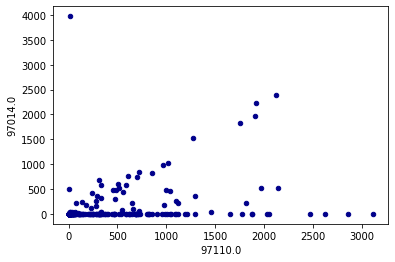

In [150]:
cpt_ds1.plot.scatter(x=5, y=13, c='Darkblue')

In [0]:
usage_ds = cpt_ds1.describe()

In [75]:
usage_ds

,97010.0,97035.0,97140.0,97112.0,97110.0,97012.0,99211.0,97032.0,97039.0,97530.0,97014.0,97018.0,97026.0,97033.0,98941.0,97034.0,97116.0,98940.0,97535.0,97016.0,98943.0,99213.0,99203.0,99214.0,99204.0,97024.0,97124.0,64999.0,97022.0,97750.0,72070.0,99070.0,72100.0,99215.0,72040.0,73030.0,99212.0,99082.0,73560.0,99358.0,...,70350.0,99282.0,99201.0,95900.0,71045.0,73521.0,99024.0,64479.0,80053.0,73140.0,97520.0,97100.0,64480.0,85610.0,85025.0,27096.0,96116.0,76881.0,95831.0,87086.0,82977.0,72114.0,97044.0,97504.0,81025.0,64413.0,70110.0,72082.0,74000.0,64483.0,73000.0,64484.0,72074.0,23350.0,97122.0,76770.0,81000.0,81001.0,99407.0,mean
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,...,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,426.070111,403.184502,374.892989,373.752768,370.918819,292.343173,179.560886,175.520295,159.225092,153.357934,113.409594,68.878229,42.357934,38.630996,34.981550,34.778598,23.132841,19.354244,16.512915,13.852399,13.571956,12.476015,9.568266,7.863469,6.756458,6.719557,3.446494,3.298893,3.040590,2.369004,2.136531,2.114391,1.992620,1.970480,1.738007,1.642066,1.402214,1.317343,0.885609,0.763838,...,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.007380,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,0.003690,18.947622
std,939.684777,918.038163,831.669254,821.575403,574.174016,701.235648,859.851496,430.198772,838.011604,405.786526,394.363141,389.991078,153.417203,283.366162,137.428216,167.448707,149.822082,107.231421,76.629114,139.769786,100.048661,35.664361,31.113084,19.100121,17.446630,95.211435,53.095057,37.055154,27.196034,30.395729,9.074169,12.251599,9.617112,7.757855,9.846676,9.717925,6.049536,12.411570,5.423356,9.299320,...,0.085748,0.121491,0.085748,0.121491,0.085748,0.121491,0.121491,0.121491,0.121491,0.085748,0.085748,0.085748,0.121491,0.121491,0.121491,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,0.060746,38.188541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.500000,3.000000,2.000000,5.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

  ITERATING OVER DATASET COLUMNS (CPT CODES) TO CLUSTER BY USAGE BASED ON AVERAGE AND GETTING NUMBER OF CLUSTERS

In [0]:
def getClusters(av):
  if av > 350:
    return 1;
  elif av > 250:
    return 2;
  elif av > 100:
    return 3;
  elif av < 100:
    return 4;

In [0]:
#THIS IS A GROUPING FUNCTION BY REPETITIONS IN EVERY LINE
#class_counts = cpt_ds1.groupby(97112.0).size()
#class_counts

CREATE ARRAY WITH ONLY THE "MEAN" VALUES TO PLOT USAGE BY CPT CODE

In [0]:
avg_array = [];
for i,j in usage_ds.iterrows():
  if i == "mean":
    i = 0;
    avg_array.insert(i,j);

In [111]:
avg_df = pd.DataFrame(avg_array);
avg_df

,97010.0,97035.0,97140.0,97112.0,97110.0,97012.0,99211.0,97032.0,97039.0,97530.0,97014.0,97018.0,97026.0,97033.0,98941.0,97034.0,97116.0,98940.0,97535.0,97016.0,98943.0,99213.0,99203.0,99214.0,99204.0,97024.0,97124.0,64999.0,97022.0,97750.0,72070.0,99070.0,72100.0,99215.0,72040.0,73030.0,99212.0,99082.0,73560.0,99358.0,...,70350.0,99282.0,99201.0,95900.0,71045.0,73521.0,99024.0,64479.0,80053.0,73140.0,97520.0,97100.0,64480.0,85610.0,85025.0,27096.0,96116.0,76881.0,95831.0,87086.0,82977.0,72114.0,97044.0,97504.0,81025.0,64413.0,70110.0,72082.0,74000.0,64483.0,73000.0,64484.0,72074.0,23350.0,97122.0,76770.0,81000.0,81001.0,99407.0,mean
mean,426.070111,403.184502,374.892989,373.752768,370.918819,292.343173,179.560886,175.520295,159.225092,153.357934,113.409594,68.878229,42.357934,38.630996,34.98155,34.778598,23.132841,19.354244,16.512915,13.852399,13.571956,12.476015,9.568266,7.863469,6.756458,6.719557,3.446494,3.298893,3.04059,2.369004,2.136531,2.114391,1.99262,1.97048,1.738007,1.642066,1.402214,1.317343,0.885609,0.763838,...,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00738,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,0.00369,18.947622


In [0]:
#usage_ds.plot.pie(y='mean',figsize=(5,5))
avg_df1 = avg_df.T;
avg_df1

CREATING THE TABLE OF MEANS AS A DATASET

In [0]:
avg_df2 = avg_df1.reset_index()
avg_df2

In [199]:
avg_df3 = avg_df2.drop(avg_df2.index[len(avg_df1)-1])
avg_df3

,0,mean
0,97010,426.070111
1,97035,403.184502
2,97140,374.892989
3,97112,373.752768
4,97110,370.918819
...,...,...
175,97122,0.003690
176,76770,0.003690
177,81000,0.003690
178,81001,0.003690
